In [13]:
import sys
sys.path.append("/home/gula/Desktop/Work_capella/Python/Python_Modules_p3/") 

from Modules import *
from Modules_gula import *

########

simul = load(simul = 'gigatl3_1h [2100-200,2100+200,1800-200,1800+200,[1,200,1]] 2540');


depth=-1500

simulname is None
args (['gigatl3_1h', '[2100-200,2100+200,1800-200,1800+200,[1,200,1]]', '2540'],)
args[0] ['gigatl3_1h', '[2100-200,2100+200,1800-200,1800+200,[1,200,1]]', '2540']
len(args[0]) 3
coord
loading /net/libra/local/tmp/1//gula/ROMS/Simulations/GIGATL/GIGATL3/gigatl3_grd.nc
loading /net/libra/local/tmp/1//gula/ROMS/Simulations/GIGATL/GIGATL3/GIGATL3_1h/GIGATL3_12h_inst_2007-07-08-2007-07-12.nc
get domain [2100-200,2100+200,1800-200,1800+200,[1,200,1]] [2100
coordmax
loading /net/libra/local/tmp/1//gula/ROMS/Simulations/GIGATL/GIGATL3/gigatl3_grd.nc
loading /net/libra/local/tmp/1//gula/ROMS/Simulations/GIGATL/GIGATL3/GIGATL3_1h/GIGATL3_12h_inst_2007-07-08-2007-07-12.nc
get domain [0,1e9,0,1e9,[1,1e9,1]] [0,1e
cst
read Cs_r in grdfile.variables
no Zob in job ... using Zob = 0.01
dt
dt is read in  /net/libra/local/tmp/1//gula/ROMS/Simulations/GIGATL/GIGATL3/GIGATL3_1h/GIGATL3_12h_inst_2007-07-08-2007-07-12.nc
[1900, 2300, 1600, 2000, array([  1,   2,   3,   4,   5,   6,   7,  

In [49]:


# u and v  
u = var('u',simul,depths=[depth]).data
v = var('v',simul,depths=[depth]).data

uu = tools.u2rho(u)
vv = tools.v2rho(v)

####### grid 

ow = var('ow',simul,depths=[depth]).data   


In [56]:

b=10

####

[x,y] = np.meshgrid(np.arange(simul.x.shape[0]),np.arange(simul.x.shape[1]))
x,y = x.T,y.T

L = x*0.

for i in np.arange(b,simul.x.shape[0]-b):
    for ii in np.arange(b,simul.y.shape[0]-b):


        x_ = x[i - b: i + b +1,ii - b: ii + b +1]      
        y_ = y[i - b: i + b +1,ii - b: ii + b +1]          
        u_ = uu[i - b: i + b +1,ii - b: ii + b +1]           
        v_ = vv[i - b: i + b +1,ii - b: ii + b +1]         

        ######

        dx = x_ - x_[b,b]
        dy = y_ - y_[b,b]

        cross = (dx * v_) - (dy * u_)
        dot = (u_ * dx) + (v_ * dy)

        product = np.sqrt(u_ ** 2 + v_** 2) * np.sqrt(dx ** 2 + dy **2)
 
        sumdp = np.sum(dot) + np.sum(product)
       
        L[i, ii] = np.sum(cross) / sumdp 
  


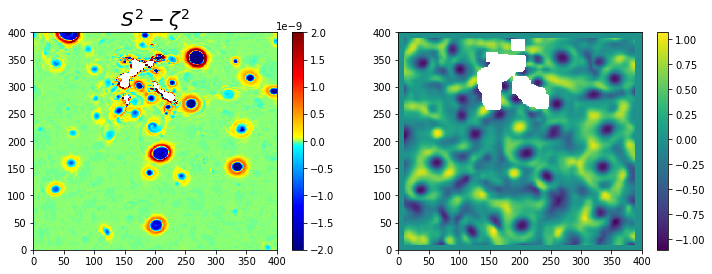

In [57]:

fig = plt.figure(figsize=(12.0,4.0)) 
ax1 = plt.subplot(1,2,1);

plt.pcolormesh(ma.masked_invalid(ow),\
               cmap = plot.colormap('ageo'),vmin=-0.2e-8,vmax=0.2e-8);
plt.colorbar()

plt.title(r'$ S^2 - \zeta^2 $', fontsize=20)


###

ax1 = plt.subplot(1,2,2);
plt.pcolormesh(L); plt.colorbar()

